In [0]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import warnings
import os
from glob import glob
import shutil
warnings.filterwarnings('ignore')

In [2]:
# setup directory and files
base_dir = "/content/drive/My Drive/Dataset"
train_dataframe = os.path.join(base_dir, 'train.csv')
train_dir = os.path.join(base_dir, 'Train/')
data_dir = os.path.join(base_dir, 'Data/')
if not os.path.exists(data_dir):
  print("Directory Created")
  os.makedirs(data_dir)

Directory Created


In [0]:
# Load dataframe
train_df = pd.read_csv(train_dataframe)

In [4]:
train_df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [5]:
# check for any null values
train_df.isnull().any().any()

False

In [6]:
# check for any height and width is other than 1024
print((train_df['height'] != 1024).any())
print((train_df['width'] != 1024).any())

False
False


In [7]:
# some information about data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  147793 non-null  object
 1   width     147793 non-null  int64 
 2   height    147793 non-null  int64 
 3   bbox      147793 non-null  object
 4   source    147793 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [0]:
# create new dataframe with 2 columns image_id and bbox
img_bb = train_df[['image_id','bbox']]

In [9]:
# converting string to list
img_bb['bbox'] = img_bb['bbox'].str.strip('][').str.split(',')
img_bb.head()

,image_id,bbox
0,b6ab77fd7,"[834.0, 222.0, 56.0, 36.0]"
1,b6ab77fd7,"[226.0, 548.0, 130.0, 58.0]"
2,b6ab77fd7,"[377.0, 504.0, 74.0, 160.0]"
3,b6ab77fd7,"[834.0, 95.0, 109.0, 107.0]"
4,b6ab77fd7,"[26.0, 144.0, 124.0, 117.0]"


In [10]:
# define some new empty features
img_bb['x'] =''
img_bb['y'] =''
img_bb['w'] =''
img_bb['h'] =''
img_bb['xy_min'] = ''
img_bb['xy_max'] = ''
img_bb.head()

,image_id,bbox,x,y,w,h,xy_min,xy_max
0,b6ab77fd7,"[834.0, 222.0, 56.0, 36.0]",,,,,,
1,b6ab77fd7,"[226.0, 548.0, 130.0, 58.0]",,,,,,
2,b6ab77fd7,"[377.0, 504.0, 74.0, 160.0]",,,,,,
3,b6ab77fd7,"[834.0, 95.0, 109.0, 107.0]",,,,,,
4,b6ab77fd7,"[26.0, 144.0, 124.0, 117.0]",,,,,,


In [11]:
# This loop will loop through whole data and update newly created features
%%time
for i in range(len(img_bb)):
  img_bb.iloc[i,1] = pd.to_numeric(img_bb.iloc[i,1], downcast='integer')
  img_bb.loc[i, 'x'] = img_bb.loc[i, 'bbox'][0]
  img_bb.loc[i, 'y'] = img_bb.loc[i, 'bbox'][1]
  img_bb.loc[i, 'w'] = img_bb.loc[i, 'bbox'][2]
  img_bb.loc[i, 'h'] = img_bb.loc[i, 'bbox'][3]
  img_bb.loc[i, 'xy_min'] = (int(img_bb.loc[i, 'x']), int(img_bb.loc[i, 'y']))
  img_bb.loc[i, 'xy_max'] = (int(img_bb.loc[i, 'x'] + img_bb.loc[i, 'w']), int(img_bb.loc[i, 'y'] + img_bb.loc[i, 'h']))
  if i % 3000 == 0:
    print('iter:' ,i)

iter: 0
iter: 3000
iter: 6000
iter: 9000
iter: 12000
iter: 15000
iter: 18000
iter: 21000
iter: 24000
iter: 27000
iter: 30000
iter: 33000
iter: 36000
iter: 39000
iter: 42000
iter: 45000
iter: 48000
iter: 51000
iter: 54000
iter: 57000
iter: 60000
iter: 63000
iter: 66000
iter: 69000
iter: 72000
iter: 75000
iter: 78000
iter: 81000
iter: 84000
iter: 87000
iter: 90000
iter: 93000
iter: 96000
iter: 99000
iter: 102000
iter: 105000
iter: 108000
iter: 111000
iter: 114000
iter: 117000
iter: 120000
iter: 123000
iter: 126000
iter: 129000
iter: 132000
iter: 135000
iter: 138000
iter: 141000
iter: 144000
iter: 147000
CPU times: user 5min 33s, sys: 8.27 s, total: 5min 41s
Wall time: 5min 27s


In [12]:
# lets check our work
img_bb.head()

,image_id,bbox,x,y,w,h,xy_min,xy_max
0,b6ab77fd7,"[834, 222, 56, 36]",834,222,56,36,"(834, 222)","(890, 258)"
1,b6ab77fd7,"[226, 548, 130, 58]",226,548,130,58,"(226, 548)","(356, 606)"
2,b6ab77fd7,"[377, 504, 74, 160]",377,504,74,160,"(377, 504)","(451, 664)"
3,b6ab77fd7,"[834, 95, 109, 107]",834,95,109,107,"(834, 95)","(943, 202)"
4,b6ab77fd7,"[26, 144, 124, 117]",26,144,124,117,"(26, 144)","(150, 261)"


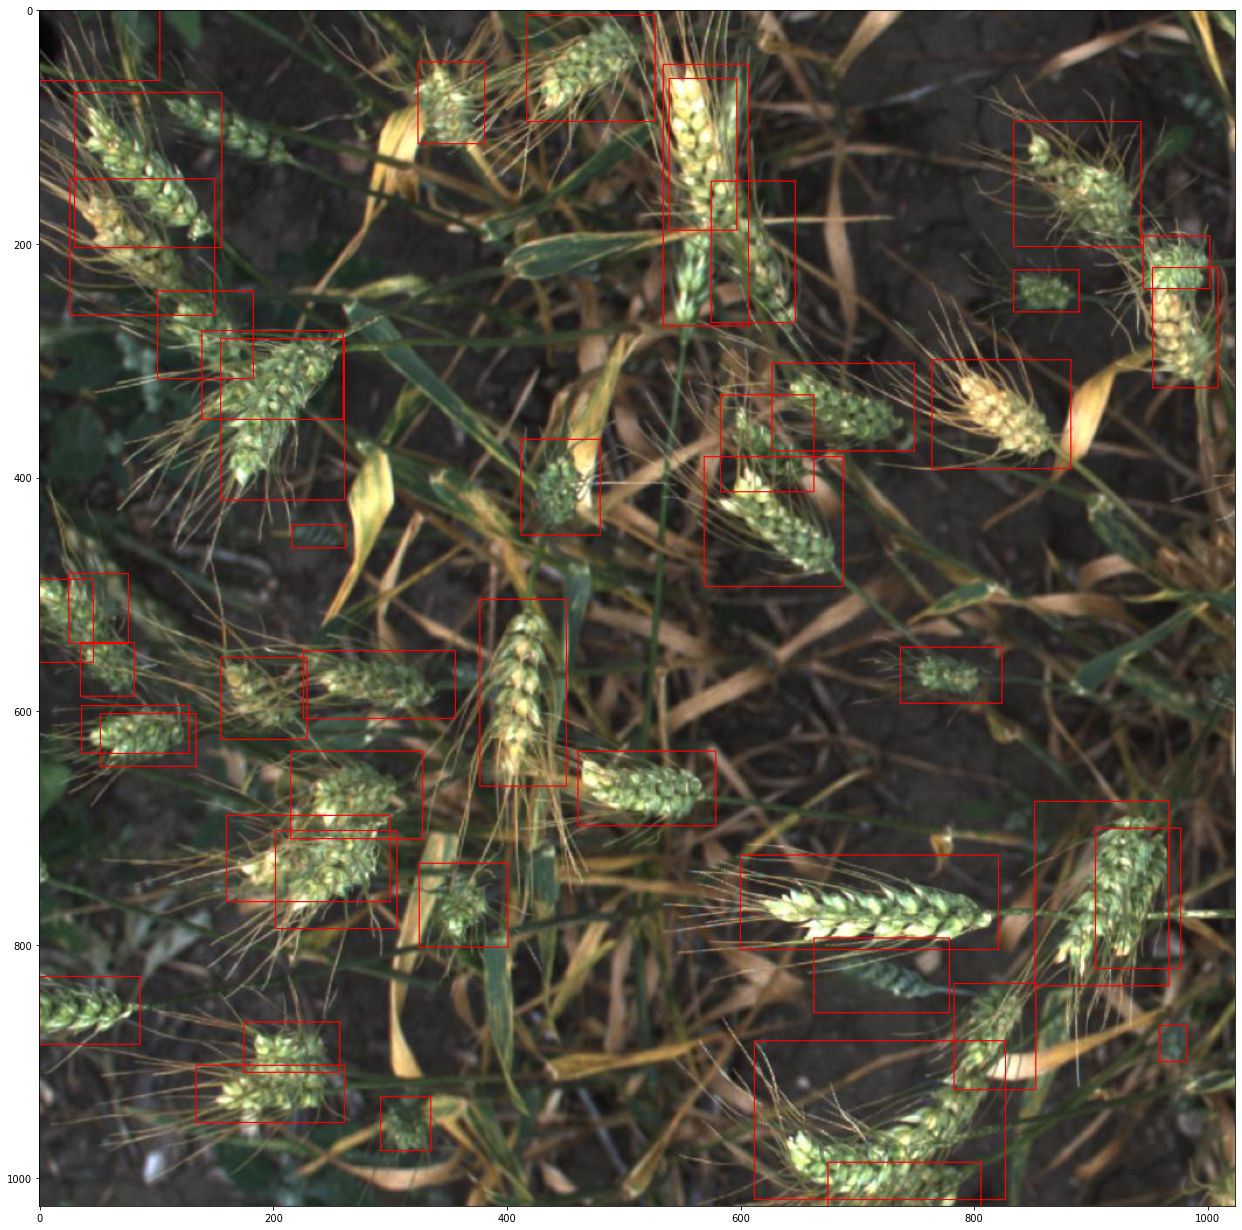

In [13]:
# checking bounding box with one image
check_img_id = img_bb.loc[0,'image_id']
img = cv2.imread(train_dir + check_img_id +'.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i in range(len(img_bb[img_bb['image_id'] == check_img_id])):
  rec = cv2.rectangle(rgb_img, img_bb.loc[i,'xy_min'], img_bb.loc[i,'xy_max'], (255,0,0), 1, 1)
plt.figure(figsize = (22,22))
plt.imshow(rgb_img)

# Converting into yolo label

In [14]:
image_id_list = train_df['image_id'].unique()
len(image_id_list)

3373

In [0]:
train_dir_images_list = os.listdir(train_dir)

In [16]:
print('Number of images without label: {}'.format(len(train_dir_images_list) - len(image_id_list)))

Number of images without label: 49


## Making blank {image_id}.txt files

In [0]:
# becuase 49 images dont have labels and it will cuase error while training  
for img in train_dir_images_list:
  f  = open(data_dir + img[:-4] + ".txt", "w")
  f.close()

## Now loop though all .txt files to fill with labels

In [0]:
label = pd.DataFrame()

In [19]:
# This loop will generate center_x, center_y and width and height feature and write it in {image_id}.txt in yolo format

%%time
for j , id in enumerate(image_id_list):
  temp_df = train_df[train_df['image_id']== id][['image_id','bbox']]
  temp_df['bbox'] = temp_df['bbox'].str.strip('][').str.split(',')
  temp_df['x_min'] =''
  temp_df['y_min'] =''
  temp_df['w'] =''
  temp_df['h'] =''
  temp_df['x_center'] = ''
  temp_df['y_center'] = ''
  temp_df['yolo_w'] =''
  temp_df['yolo_h'] =''
  f  = open(data_dir + id + ".txt", "w+")
  for i in temp_df.index:
    temp_df.loc[i,'bbox'] = pd.to_numeric(temp_df.loc[i,'bbox'],downcast='integer')
    temp_df.loc[i,'x_min'] = temp_df.loc[i,'bbox'][0]
    temp_df.loc[i,'y_min'] = temp_df.loc[i,'bbox'][1]
    temp_df.loc[i,'w'] = temp_df.loc[i,'bbox'][2]
    temp_df.loc[i,'h'] = temp_df.loc[i,'bbox'][3]
    temp_df.loc[i,'x_center'] = np.round((temp_df.loc[i,'x_min'] + int(temp_df.loc[i,'w']/2))/1024,6)
    temp_df.loc[i,'y_center'] = np.round((temp_df.loc[i,'y_min'] + int(temp_df.loc[i,'h']/2))/1024,6)
    temp_df.loc[i,'yolo_w'] = np.round(temp_df.loc[i,'w']/1024,6)
    temp_df.loc[i,'yolo_h'] = np.round(temp_df.loc[i,'h']/1024,6)
    f.write(str(0)+' '+str(temp_df.loc[i,'x_center'])+' ' +str(temp_df.loc[i,'y_center'])+' '+str(temp_df.loc[i,'yolo_w'])+' '+str(temp_df.loc[i,'yolo_h'])+'\n')
  
  f.close()
  label = label.append(temp_df)  

CPU times: user 8min 31s, sys: 2.66 s, total: 8min 34s
Wall time: 8min 55s


In [20]:
label.head()

,image_id,bbox,x_min,y_min,w,h,x_center,y_center,yolo_w,yolo_h
0,b6ab77fd7,"[834, 222, 56, 36]",834,222,56,36,0.841797,0.234375,0.054688,0.035156
1,b6ab77fd7,"[226, 548, 130, 58]",226,548,130,58,0.28418,0.563477,0.126953,0.056641
2,b6ab77fd7,"[377, 504, 74, 160]",377,504,74,160,0.404297,0.570312,0.072266,0.15625
3,b6ab77fd7,"[834, 95, 109, 107]",834,95,109,107,0.867188,0.144531,0.106445,0.104492
4,b6ab77fd7,"[26, 144, 124, 117]",26,144,124,117,0.085938,0.197266,0.121094,0.114258


In [21]:
# Expected length should be 3422 one txt file for each image
print("Length of data folder we created is: {}".format(len(glob(data_dir + "*"))))

Length of data folder we created is: 3422


Now we need to move all images to data directory where we have all labels ready.

In [22]:
%%time
files = os.listdir(train_dir)
for f in files:
  shutil.copy(train_dir + "/" + f, data_dir)

CPU times: user 2.99 s, sys: 2.69 s, total: 5.69 s
Wall time: 14min 52s


In [23]:
# Expected length should be 3422*2 = 6844
print("Length of label folder we created is: {}".format(len(glob(data_dir + "*"))))

Length of label folder we created is: 6844


Now we need to create train.txt file which has all images name.

In [0]:
image_files = []
for filename in os.listdir(data_dir):
  if filename.endswith(".jpg"):
    image_files.append(data_dir + filename)

with open(base_dir + "/train.txt", "w") as outfile:
  for image in image_files:
    outfile.write(image)
    outfile.write("\n")
  outfile.close()

Done! Now we have train.txt file with all images location.